In [1]:
import numpy as np

In [3]:
c = np.array([[False, True, False],
              [True, False, False],
              [False, False, True]])
np.where(c == True)

(array([0, 1, 2]), array([1, 0, 2]))

In [4]:
a = np.array([1,1,2,2,3])
b = np.array([0,2,2,1,1])

In [5]:
a == b

array([False, False,  True, False, False])

In [12]:
import torch
from dataset import Planetoid
import os.path as osp
import torch_geometric.transforms as T
import numpy as np
name = 'Cora'
path = osp.join('datasets', name)
split = 'imbalance'
imb_ratio = 10
fix_minority = True

dataset = Planetoid(path, name, split=split, imb_ratio= imb_ratio, fix_minority= fix_minority, transform = T.NormalizeFeatures())
data = dataset[0]
imb_cls_num_list = dataset.imb_cls_num_list
# def get_idx_info(data, n_cls):
#     train_mask = data.train_mask
#     labels = data.y
#     index_list = torch.arange(labels.shape[0])  # all node indices
#     train_nodes_per_cls = []
#     num_train_nodes_per_cls     = []
#     for i in range(n_cls):
#         cls_indices = index_list[((labels == i) & train_mask)] # all nodes idx with label i
#         num_nodes_i = (labels[train_mask] == i).sum()
#         train_nodes_per_cls.append(cls_indices)
#         num_train_nodes_per_cls.append(int(num_nodes_i.item()))
#     return train_nodes_per_cls, num_train_nodes_per_cls


def balance_embedding(data, n_cls):
    x, edge_index = data.x, data.edge_index
    imb_train_mask = data.imb_train_mask
    max_num = max(imb_cls_num_list)
    imb_cls_num = n_cls // 2

    upsamples = np.array(max_num - np.array(imb_cls_num_list)) # [ 0  0  0  0 18 18 18]
    print(upsamples)




In [7]:
imb_cls_num_list

[20, 20, 20, 20, 2, 2, 2]

In [14]:
a = torch.tensor([[20, 20, 20, 20, 2, 2, 2],
                  [1,  2,  3,  4,  5,  6, 7]], dtype=torch.float)


In [15]:
import torch.nn.functional as F

F.normalize(a)

tensor([[0.4981, 0.4981, 0.4981, 0.4981, 0.0498, 0.0498, 0.0498],
        [0.0845, 0.1690, 0.2535, 0.3381, 0.4226, 0.5071, 0.5916]])

In [23]:
a / np.linalg.norm(a, axis=1, ord=2, keepdims=True)

tensor([[0.4981, 0.4981, 0.4981, 0.4981, 0.0498, 0.0498, 0.0498],
        [0.0845, 0.1690, 0.2535, 0.3381, 0.4226, 0.5071, 0.5916]])

In [24]:
a

tensor([[20., 20., 20., 20.,  2.,  2.,  2.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.]])

In [25]:
a@ a.t()

tensor([[1612.,  236.],
        [ 236.,  140.]])

In [28]:
b = np.array([[1,2], [3,4]])
b @ b.transpose()

array([[ 5, 11],
       [11, 25]])

In [13]:
A = np.array([[0.1, 0.3, 0.2, 0.7, 0.4], 
              [0.7, 0.5, 0.6, 0.5, 0.3],
              [0.3, 0.2, 1.1, 0.1, 1.3],
              [0.5, 0.3, 0.2, 0.7, 0.6],
              [1.0, 2.2, 0.3, 0.6, 0.2]])

np.fill_diagonal(A, 0)

In [14]:
A

array([[0. , 0.3, 0.2, 0.7, 0.4],
       [0.7, 0. , 0.6, 0.5, 0.3],
       [0.3, 0.2, 0. , 0.1, 1.3],
       [0.5, 0.3, 0.2, 0. , 0.6],
       [1. , 2.2, 0.3, 0.6, 0. ]])

In [15]:
B = np.array([1,1,0,2,0])

In [16]:
from torch_scatter import scatter_mean
scatter_mean(torch.from_numpy(A), torch.from_numpy(B), dim = 0)

tensor([[0.6500, 1.2000, 0.1500, 0.3500, 0.6500],
        [0.3500, 0.1500, 0.4000, 0.6000, 0.3500],
        [0.5000, 0.3000, 0.2000, 0.0000, 0.6000]], dtype=torch.float64)

In [19]:
torch.LongTensor(torch.nonzero(data.imb_train_mask, as_tuple=True)[0])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,  30,
         32,  34,  35,  36,  37,  40,  44,  45,  46,  48,  51,  52,  53,  54,
         57,  58,  59,  60,  61,  62,  64,  65,  68,  71,  72,  73,  74,  79,
         80,  81,  83,  85,  88,  90,  94,  95,  98, 100, 101, 102, 103, 104,
        105, 109, 110, 111, 112, 121, 124, 126, 131, 133, 134, 135, 136, 137,
        138, 139])

In [22]:
sorted_indices = np.argsort(-A, axis=1)

In [2]:
numbers_list = [4, 4, 5, 6, 6, 5,5]

# Counting the frequency of each number using a dictionary
frequency_dict = {}
for number in numbers_list:
    frequency_dict[number] = frequency_dict.get(number, 0) + 1

frequency_dict

{4: 2, 5: 3, 6: 2}

In [5]:
frequency_dict.keys()

dict_keys([4, 5, 6])

In [8]:
2 in frequency_dict.keys()

False

In [34]:
np.unique(np.array(new_train_nodes))

array([0, 1, 2, 3, 4])

In [12]:
import numpy as np
a = {4: 9, 5:9, 6:9}
b = np.array([4,4,5,6,6,5])

result = np.array([a[item] for item in b])

In [13]:
result

array([9, 9, 9, 9, 9, 9])

In [40]:
c = np.array([31, 97, 65])

In [41]:
data.imb_train_mask[c] = True

In [43]:
data.imb_train_mask.sum()

tensor(88)

In [44]:
data.imb_train_mask.sum()

tensor(88)

In [1]:
7//2

3

In [14]:
a = np.array([[3,2,1], [5,6,1],[9,2,10]])

In [15]:
sorted_indices = np.argsort(-a, axis=1)

In [16]:
sorted_indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 0, 1]])

In [ ]:
import torch

a = [torch.tensor([1,2,3]), torch.tensor([4,5,6]), torch.tensor([7,8,9])]

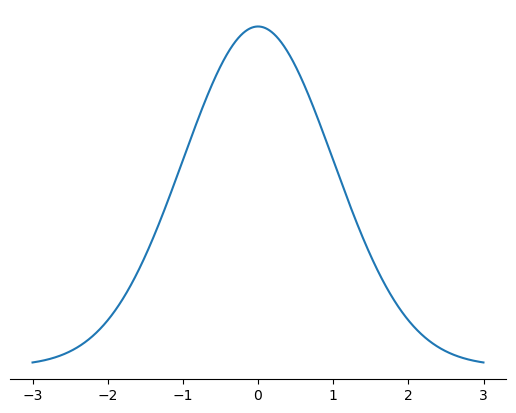

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation
mu, sigma = 0, 1

# Generating a range of values from -3 to 3 with 0.001 step
x = np.arange(-3, 3, 0.001)

# Calculating the normal distribution y values
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Creating the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Removing the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
# Adding titles and labels
# plt.title('Normal Distribution')
# plt.xlabel('Values')
# plt.ylabel('Frequency')

# Showing the grid
# plt.grid(True)

# Displaying the plot
plt.show()

In [4]:
n_cls = 6
num_minor_cls = n_cls // 2 

In [1]:
import numpy as np

In [2]:
a = np.array([1,2,3,3,4,4,5,5,6,6,6])
b = np.array([4,5,6])

np.isin(a,b)

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True])

In [1]:
[10] * 3

[10, 10, 10]

In [1]:
[True] * 5

[True, True, True, True, True]

In [2]:
import torch
a = torch.tensor([0.0501, 0.0000, 0.0000, 0.0000, 0.0000, 0.1514, 0.1550, 0.0532, 0.0482,
        0.1060, 0.0000, 0.1351, 0.0808, 0.0000, 0.0655, 0.0018, 0.0304, 0.0367,
        0.1430, 0.0000, 0.0000, 0.0552, 0.0000, 0.1345, 0.0000, 0.0971, 0.0000,
        0.0000, 0.0106, 0.1130, 0.0536, 0.1379, 0.1555, 0.0000, 0.1556, 0.0399,
        0.0000, 0.0000, 0.0942, 0.0000, 0.0000, 0.0075, 0.0000, 0.0652, 0.0000,
        0.2378, 0.0000, 0.0000, 0.0000, 0.0190, 0.0000, 0.0000, 0.0402, 0.0431,
        0.0264, 0.0000, 0.0000, 0.0773, 0.0000, 0.0000, 0.0000, 0.0000, 0.0022,
        0.0309, 0.0000, 0.0000, 0.0000, 0.0000, 0.1825, 0.0173, 0.0392, 0.0000,
        0.0000, 0.1303, 0.0000, 0.0000, 0.0000, 0.0933, 0.0000, 0.0000, 0.1578,
        0.0409, 0.0000, 0.0609, 0.0438, 0.0000, 0.0748, 0.0000, 0.0000, 0.1184,
        0.0395, 0.0000, 0.0000, 0.0770, 0.0501, 0.0682, 0.0000, 0.0586, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0997, 0.0000, 0.0000, 0.0601, 0.1419, 0.0000,
        0.1086, 0.0320, 0.0030, 0.0669, 0.0000, 0.0558, 0.0000, 0.0000, 0.0000,
        0.0549, 0.0000, 0.0199, 0.1193, 0.0056, 0.0000, 0.0000, 0.0550, 0.0000,
        0.0752, 0.0429, 0.0082, 0.0000, 0.0000, 0.0000, 0.0102, 0.0000, 0.0000,
        0.1485, 0.0000, 0.0406, 0.0000, 0.0549, 0.0717, 0.0540, 0.0000, 0.0421,
        0.0000, 0.0554, 0.0140, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.1620, 0.0000, 0.0000, 0.0000, 0.0228, 0.0000, 0.0000, 0.0271,
        0.0220, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0424, 0.0669, 0.0574,
        0.0292, 0.0000, 0.1687, 0.0000, 0.0807, 0.1002, 0.0000, 0.1643, 0.0000,
        0.1164, 0.0000, 0.0455, 0.0000, 0.0000, 0.0000, 0.0000, 0.1716, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0142, 0.0000, 0.0000, 0.0778, 0.0000,
        0.0237, 0.0000, 0.0825, 0.0730, 0.0256, 0.0000, 0.0196, 0.0990, 0.1816,
        0.0000, 0.0000, 0.0714, 0.0000, 0.0000, 0.0228, 0.0041, 0.0564, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0680, 0.0000, 0.1509, 0.1089, 0.0000,
        0.0933, 0.0396, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0435, 0.0000,
        0.0000, 0.0926, 0.1252, 0.0285, 0.0290, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0683, 0.0000, 0.0420, 0.0866, 0.0000, 0.0000, 0.0000, 0.0880,
        0.0122, 0.0000, 0.0000, 0.0815], device='cuda:0')
b = torch.tensor([ 1.8796e-02, -4.4228e-03,  3.2078e-02,  1.9116e-02,  1.4689e-03,
         2.0079e-02,  1.2565e-02, -9.4041e-03,  1.7412e-02,  3.9940e-02,
        -3.1709e-04,  4.6095e-03, -3.0108e-03,  1.8429e-03,  5.0848e-03,
        -1.3498e-03,  9.0720e-03, -2.1476e-03,  3.2465e-02,  1.5836e-02,
         4.0824e-02,  1.4351e-02, -3.9492e-03,  1.0651e-02, -5.7140e-03,
         3.2214e-02, -1.7783e-03,  6.5357e-02, -3.8771e-03, -9.9892e-04,
         5.7998e-02,  2.0355e-02, -5.3977e-03,  5.3222e-02,  1.5943e-03,
         1.8727e-02, -9.7003e-03, -4.5360e-03,  3.2876e-03,  4.8972e-03,
        -5.7637e-03, -3.5094e-03, -4.9703e-03, -1.5703e-03, -1.9465e-03,
        -4.0052e-03,  1.6495e-02,  5.8101e-03,  1.0356e-02, -1.3679e-02,
        -1.9200e-03,  1.8529e-02, -6.1412e-03,  2.7708e-03,  1.7562e-02,
        -4.3489e-03, -3.6856e-03,  4.7559e-02,  5.7486e-02, -1.0308e-03,
         2.4056e-02,  2.7839e-02,  2.0453e-02, -7.2203e-03,  1.9933e-02,
        -5.1106e-03, -1.7211e-03,  1.0159e-02, -6.6886e-03, -3.6662e-03,
         3.2569e-02, -1.1208e-03, -1.2006e-02,  5.4139e-03, -3.0357e-03,
         1.9920e-02,  1.5119e-02, -1.7462e-03,  2.5520e-03,  1.3106e-02,
        -5.1338e-03, -5.9698e-03,  2.9439e-03, -4.5611e-03,  1.2630e-02,
         3.9600e-02, -3.7227e-04,  8.5397e-03,  4.3944e-02,  3.4378e-02,
         3.0293e-02,  3.2925e-02, -1.5223e-03, -1.1940e-04, -9.9277e-03,
         2.2107e-02,  2.3735e-02,  2.5518e-02,  1.2901e-02, -4.0795e-03,
        -4.0891e-03,  3.2965e-02,  1.7975e-02, -7.2480e-03,  4.3629e-02,
         5.7167e-03, -7.0749e-03,  4.9571e-03, -8.6874e-03, -2.4986e-03,
        -4.4821e-03,  1.2568e-02, -2.0296e-03,  1.9383e-02,  6.7858e-03,
         2.0026e-02, -2.2465e-03,  3.8231e-02,  1.0151e-02,  3.8361e-02,
         2.6015e-02,  1.3136e-02, -1.6139e-04, -7.7029e-03, -3.0649e-03,
         2.8500e-02, -4.3032e-04, -1.0720e-02, -7.9818e-03,  2.7766e-02,
         2.2864e-02,  1.2506e-02, -1.1022e-02,  2.3994e-02, -2.6181e-03,
         4.5866e-03,  5.0835e-02, -4.0287e-03,  3.9991e-03, -2.3533e-03,
         1.1859e-02,  2.8515e-02,  2.8735e-02, -3.8338e-04,  1.1716e-02,
        -6.8708e-04, -6.3349e-04,  2.2435e-02,  1.1844e-02,  1.5340e-02,
         1.6792e-03, -4.4893e-03,  5.7045e-02,  3.4212e-03, -4.3182e-03,
         3.9871e-03,  3.5535e-04, -8.8043e-03,  2.5101e-02, -9.6015e-03,
         1.8918e-02, -2.5986e-03, -6.7061e-03, -1.9832e-03, -6.9586e-03,
        -2.6700e-04,  5.2158e-03,  5.1217e-02,  1.4723e-03,  1.7601e-02,
         1.6709e-02,  1.0272e-02, -6.1588e-03,  1.7907e-02,  5.4243e-02,
         1.5596e-02,  2.8100e-02, -1.0224e-02, -3.1497e-03, -5.0092e-03,
         1.2541e-02, -6.9602e-03, -6.2113e-03,  1.6902e-03, -1.4150e-03,
        -7.6179e-04,  2.2196e-02,  2.2349e-03,  2.3555e-02,  2.1874e-02,
        -6.8529e-06,  1.5048e-02,  2.7873e-03,  1.0025e-02, -2.3042e-03,
         1.1096e-02, -9.0425e-03, -1.2090e-02,  2.5262e-02,  1.9502e-02,
         3.5535e-02, -4.8110e-03,  5.4671e-02,  7.3383e-03, -7.3827e-04,
        -4.5314e-03, -1.2793e-03,  3.2644e-02,  2.5347e-02,  3.8730e-03,
         3.1020e-02,  8.6647e-03, -2.1498e-03,  1.4469e-02,  1.5123e-03,
         3.4905e-02, -4.5100e-03,  3.1163e-02, -3.3034e-03, -9.7821e-04,
        -1.5875e-03,  4.5438e-04, -1.8966e-04,  1.0672e-02, -4.2313e-03,
        -2.9077e-03, -3.4665e-03,  2.5006e-02, -9.4382e-03, -8.5704e-03,
         2.0049e-02,  2.2265e-02, -7.9969e-04,  8.7048e-03, -4.6602e-03,
        -6.5185e-03, -2.9353e-03,  3.4366e-02,  2.9408e-03, -8.0578e-03,
         2.1304e-02,  4.4984e-02, -2.5833e-03,  3.8613e-02,  4.0029e-02,
         1.1495e-03, -3.3914e-03, -2.3650e-03,  4.2752e-03, -1.5103e-03,
        -2.3215e-03,  2.2734e-03,  1.2443e-02,  4.5380e-02,  2.4575e-02,
        -3.6184e-03], device='cuda:0')

In [3]:
from torch.nn.functional import binary_cross_entropy
binary_cross_entropy(a, b, reduction='sum')

../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [1,0,0] Assertion `target_val >= zero && target_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [7,0,0] Assertion `target_val >= zero && target_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [10,0,0] Assertion `target_val >= zero && target_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [12,0,0] Assertion `target_val >= zero && target_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [15,0,0] Assertion `target_val >= zero && target_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [17,0,0] Assertion `target_val >= zero && target_val <= one` failed.
../aten/src/ATen/native/cuda/Loss.cu:95: operator(): block: [0,0,0], thread: [22,0,0] Assertion `target_val >= zero && target_

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
